In [ ]:
import pandas as pd
from typing import Optional, Union, List
from pathlib import Path

def read_parquet_file(file_path: Union[str, Path], columns: Optional[List[str]] = None) -> pd.DataFrame:
    """
    Read a parquet file into a pandas DataFrame.
    
    Args:
        file_path: Path to the parquet file
        columns: Optional list of columns to read
        
    Returns:
        DataFrame containing the parquet data
    """
    return pd.read_parquet(file_path, columns=columns)


file_path = "./quantization_ablation_model/Meta-Llama-3-8B-Instruct.Q2_K.gguf/llama_classification.parquet"
df = read_parquet_file(file_path)
print(f"Loaded dataframe with shape: {df.shape}")
df.head()


In [ ]:
# TODO some classificaiton data I forgot to add the subject, so I'm going to add it now
input_data_file_path = "./input_datasets/classification_pairs.parquet"
input_data = read_parquet_file(input_data_file_path)
def add_subject_column(df: pd.DataFrame, input_data: pd.DataFrame) -> pd.DataFrame:
    """
    Add subject column to the dataframe by mapping from input_data.
    
    Args:
        df: Target dataframe to add subject column to
        input_data: Source dataframe containing subject information
        
    Returns:
        DataFrame with added subject column
    """
    # Create mapping from question to subject
    question_to_subject = dict(zip(input_data['question'], input_data['subject']))
    # Map questions to subjects
    df['subject'] = df['question'].map(question_to_subject)
    return df

df = add_subject_column(df, input_data)

In [ ]:
df[df["id"] == 13594]["response"].values[0]

In [ ]:
df.head()

In [ ]:
def calculate_accuracy(df: pd.DataFrame, group_by: str = None) -> pd.DataFrame:
    if group_by:
        accuracy_by_group = df.groupby(group_by)['correct'].mean().reset_index()
        accuracy_by_group.columns = [group_by, 'accuracy']
        
        group_counts = df.groupby(group_by).size().reset_index(name='sample_count')
        accuracy_by_group = accuracy_by_group.merge(group_counts, on=group_by)
        
        return accuracy_by_group
    else:
        overall_accuracy = df['correct'].mean()
        return pd.DataFrame({'overall_accuracy': [overall_accuracy], 'sample_count': [len(df)]})

# Calculate overall accuracy
overall_accuracy = calculate_accuracy(df)
print(f"Overall accuracy: {overall_accuracy['overall_accuracy'].values[0]:.4f}")

# Calculate accuracy for only the answers that are in A, B, C, D
valid_responses_df = df[df['response'].isin(['A', 'B', 'C', 'D'])]
valid_responses_accuracy = calculate_accuracy(valid_responses_df)
print(f"\nAccuracy for A, B, C, D responses only: {valid_responses_accuracy['overall_accuracy'].values[0]:.4f}")
print(f"Sample count: {valid_responses_accuracy['sample_count'].values[0]}")

# Calculate accuracy by subject
subject_accuracy = calculate_accuracy(df, group_by='subject')
subject_accuracy = subject_accuracy.sort_values('accuracy', ascending=False)

print("\nAccuracy by subject:")
print(subject_accuracy)


Loaded model with 1000 entries
Loaded model with 1000 entries
Error loading ./quantization_ablation_model/Meta-Llama-3-8B-Instruct.Q4_K_M.gguf/llama_classification.parquet: Could not open Parquet input source '<Buffer>': Parquet file size is 0 bytes
Loaded classification_pairs with 14042 entries

=== Accuracy Analysis ===


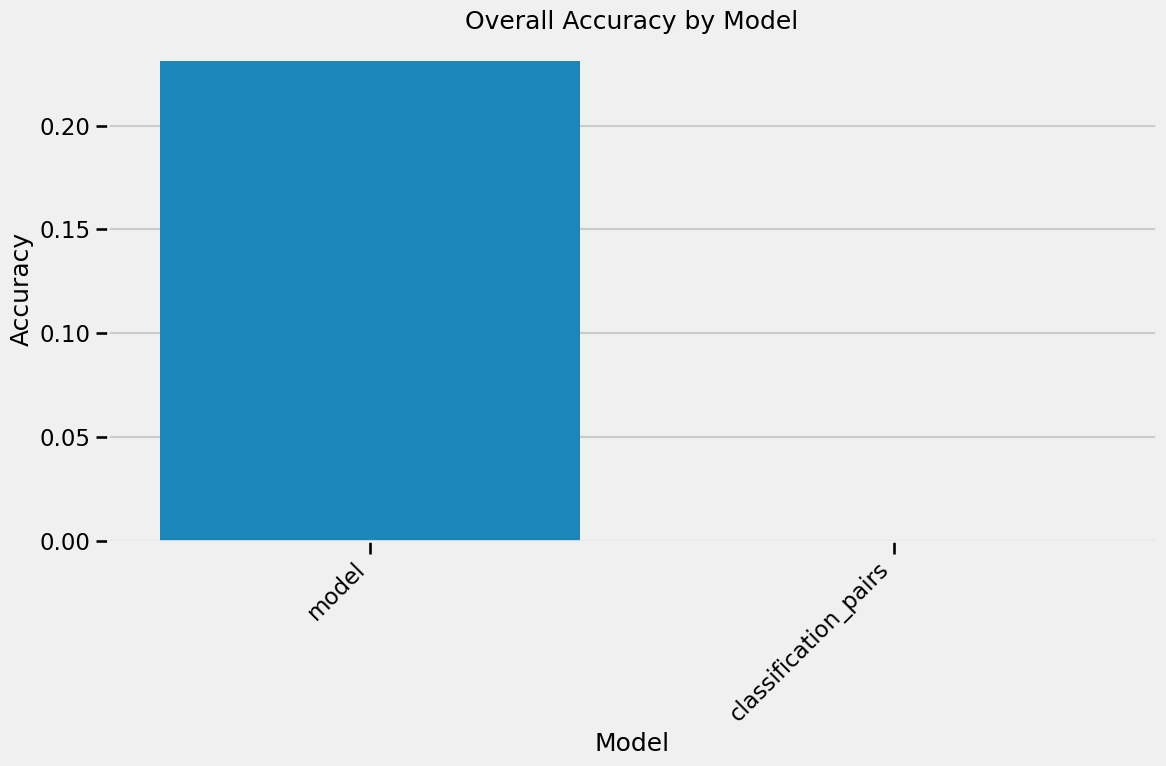

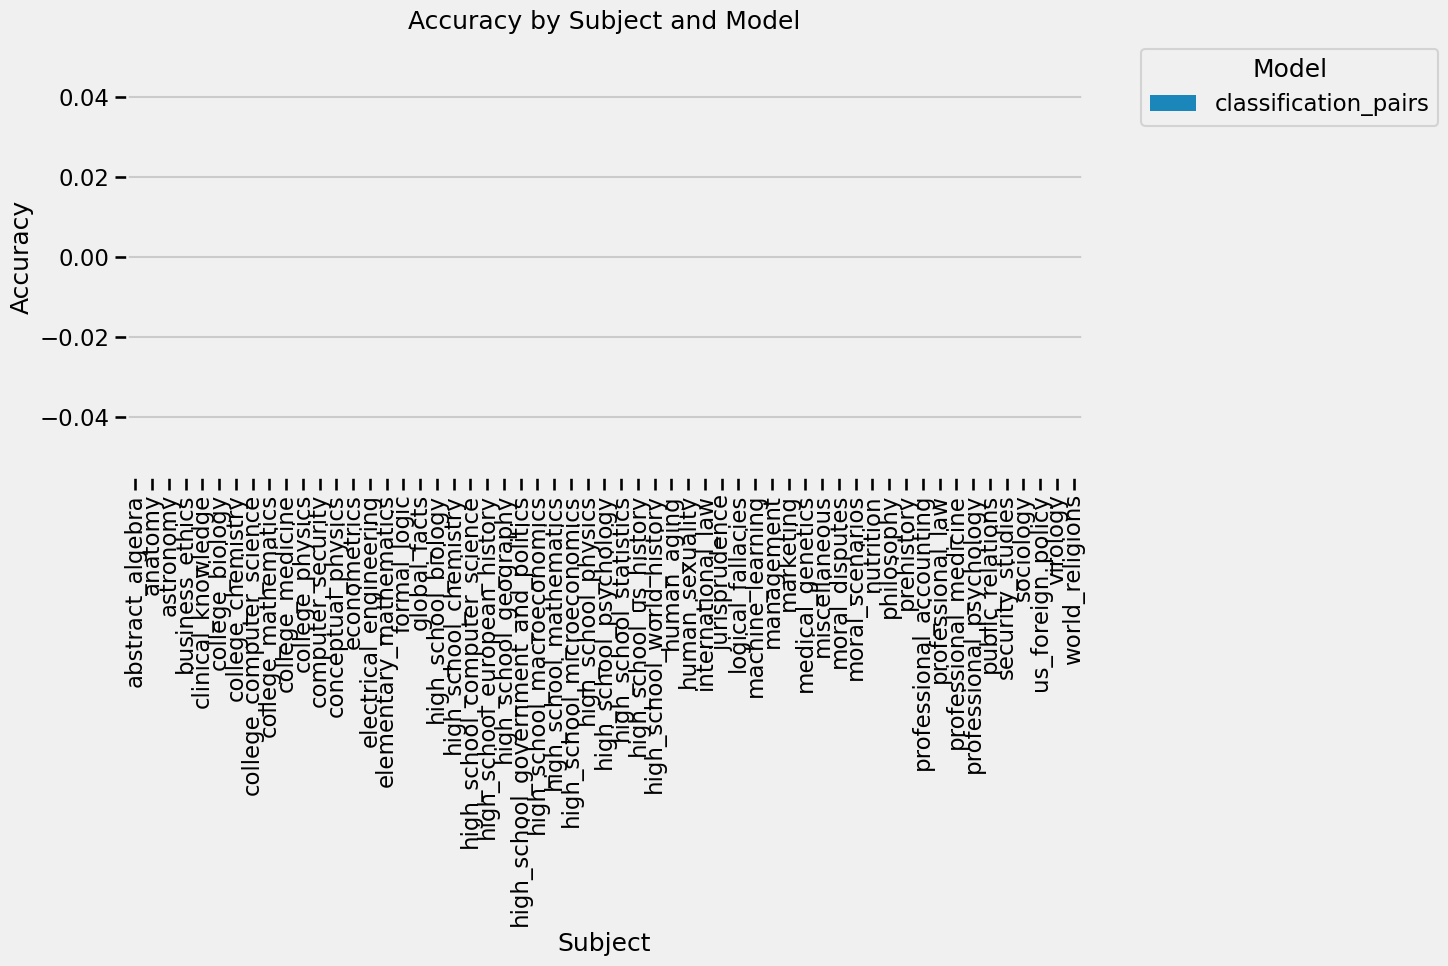

/Users/chris/haven/analysis/.venv/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/chris/haven/analysis/.venv/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


TypeError: Image data of dtype object cannot be converted to float

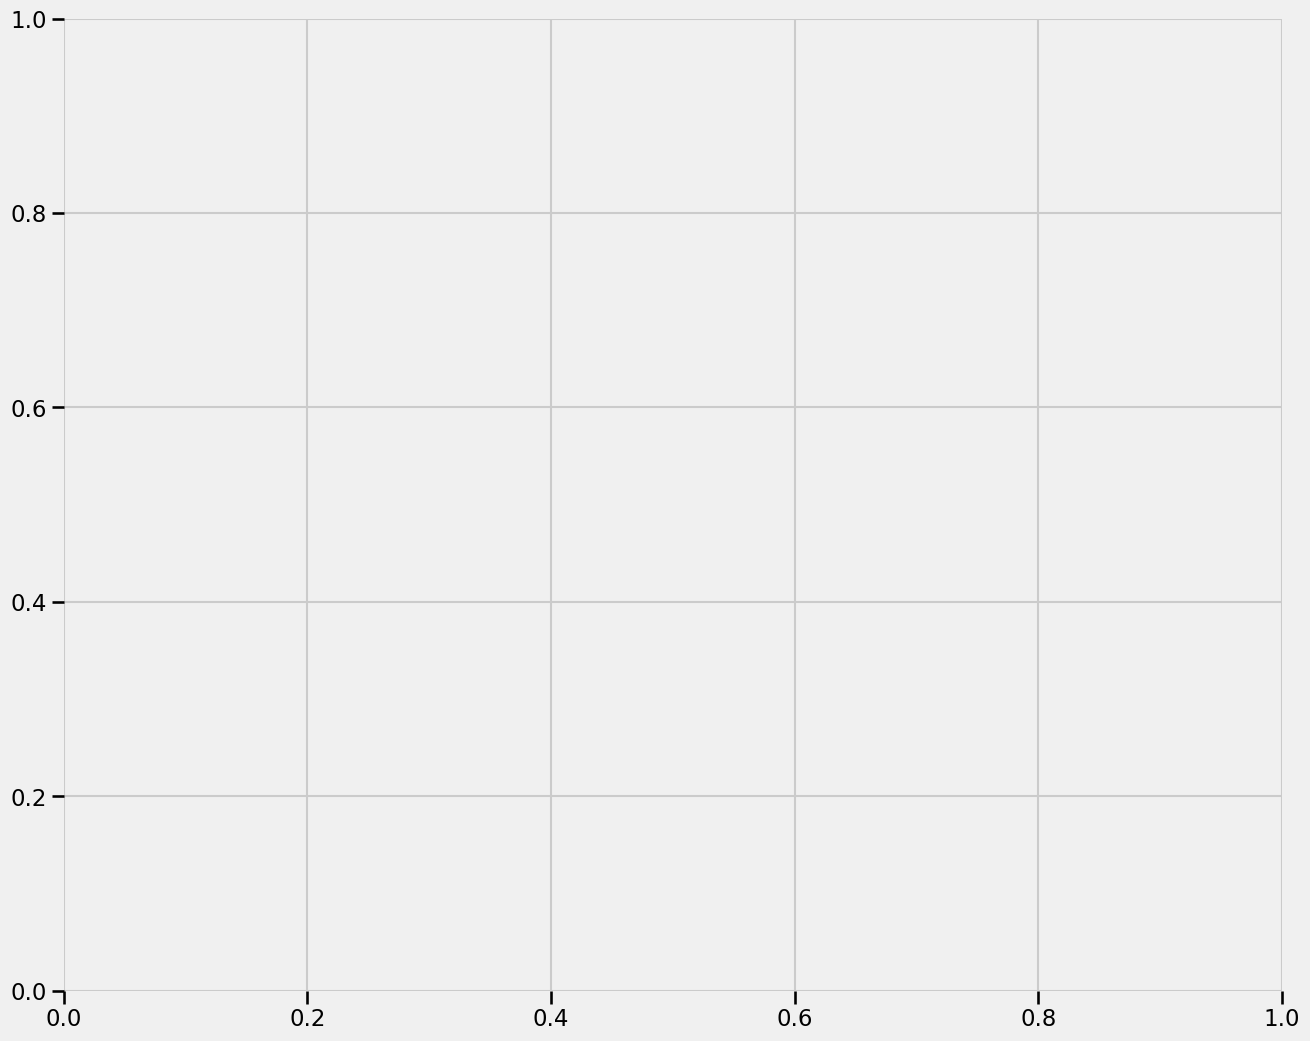